**Background and Context**

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

**Objective**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Data Description**

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

**Data Dictionary**

- CustomerId: Unique ID which is assigned to each customer
- Surname: Last name of the customer 
- CreditScore: It defines the credit history of the customer.  
- Geography: A customer’s location    
- Gender: It defines the Gender of the customer   
- Age: Age of the customer     
- Tenure: Number of years for which the customer has been with the bank
- NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
- Balance: Account balance
- HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
- EstimatedSalary: Estimated salary 
- isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
- Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    - 0=No ( Customer did not leave the bank )

                    - 1=Yes ( Customer left the bank )

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [67]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to scale the data using z-score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Library to split data set into train and test sets
from sklearn.model_selection import train_test_split

# Library to plot confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve
from sklearn import metrics

# Library to import keras backend
from tensorflow.keras import backend, optimizers
from keras import callbacks
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

# importing different functions to build NN models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# Importing Tensorflow library
import tensorflow as tf

# Load Data and Data Overview

In [3]:
# Loading csv data into dataframe
filename = 'Churn.csv'
folderpath = '/content/drive/MyDrive/Colab Notebooks/PGP in AI and ML/Project_7/'
data = pd.read_csv(folderpath+filename)
df = data.copy()

In [7]:
# Size of dataset
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 10000 rows and 14 columns


In [5]:
# Display the first 5 rows of our dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Notes:
- RowNumber should be deleted during our preprocessing step
- CustomerID should be deleted during our preprocessing step

In [5]:
# Display feature info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Notes:
- no null values for any of the features
- 2 float type features, 9 int type features, 3 object type

## Data Summary

In [7]:
# Display 5 point summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Notes:
- Average credit score is 650 but ranges from 350 to 850
- Average age of customer is 39yr, 50% of the customer base is from 32 to 44
- Customers on average have been with the bank for 5 years
- Average balance is a little less than \$76.5k, but we have an outlier around \$250,900
- Customers on average have more than 1 product
- 70% of customers have credit cards
- 51% are active members
- Average salary is \$100,090
- 20% of customers exited bank within 6 months

In [8]:
df.describe(exclude='number').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


Notes:
- Most frequent surname is Smith
- Majority of customers reside in France
- Majority of customers are male

## Unique Values

In [4]:
# Create list of numerical columns to iterate through
num_cols = df.select_dtypes(include=['number']).columns.tolist()

In [10]:
# Iterate through columns and display number of unique values
for col in num_cols:
    print(f'Number of unique values for {col}: {df[col].nunique()}')

Number of unique values for RowNumber: 10000
Number of unique values for CustomerId: 10000
Number of unique values for CreditScore: 460
Number of unique values for Age: 70
Number of unique values for Tenure: 11
Number of unique values for Balance: 6382
Number of unique values for NumOfProducts: 4
Number of unique values for HasCrCard: 2
Number of unique values for IsActiveMember: 2
Number of unique values for EstimatedSalary: 9999
Number of unique values for Exited: 2


Notes:
- Same as above for RowNumber and CustomerID are unique fields that will not add any value to our model performance

In [5]:
# Removing two columns from our numerical list
num_cols.remove('RowNumber')
num_cols.remove('CustomerId')

In [6]:
# Create list of categorical columns to iterate through
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [7]:
# Iterate through columns and display value counts
for col in cat_cols:
  print(f'\nValue count for {col}:')
  print(df[col].value_counts())
  print('--'*50)


Value count for Surname:
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
----------------------------------------------------------------------------------------------------

Value count for Geography:
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
----------------------------------------------------------------------------------------------------

Value count for Gender:
Male      5457
Female    4543
Name: Gender, dtype: int64
----------------------------------------------------------------------------------------------------


Notes:


## Duplicates

In [14]:
# Checking dataframe duplicates
print(f'There are {df.duplicated().sum()} duplicates in our dataset')

There are 0 duplicates in our dataset


## Missing Values

In [15]:
# Checking dataframe for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No null values in our dataset

# Exploratory Data Analysis (EDA)
- Check whether the dataset is balanced or not 
- Univariate analysis
- Bivariate analysis 
- Use appropriate visualizations to identify the patterns and insights 
- Any other exploratory deep dive

In [16]:
# Check balance of target in our dataset
df['Exited'].value_counts(1)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

We have an inbalanced dataset for our target variable

## Univariate Analysis

### Numerical Features

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

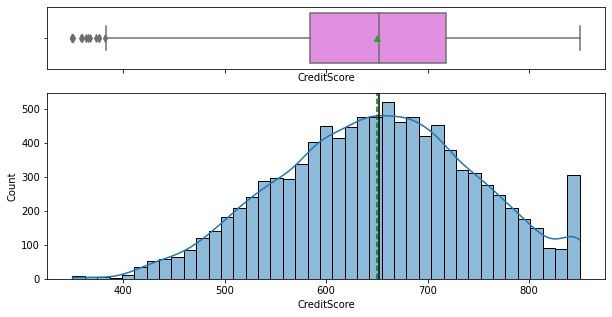

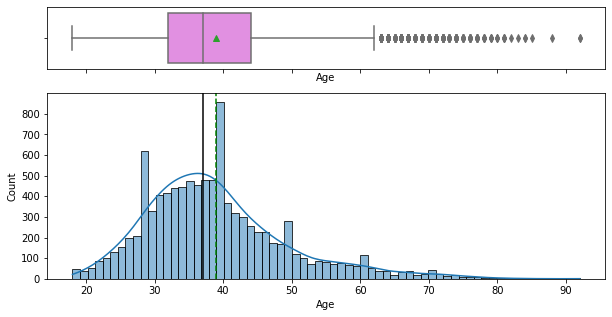

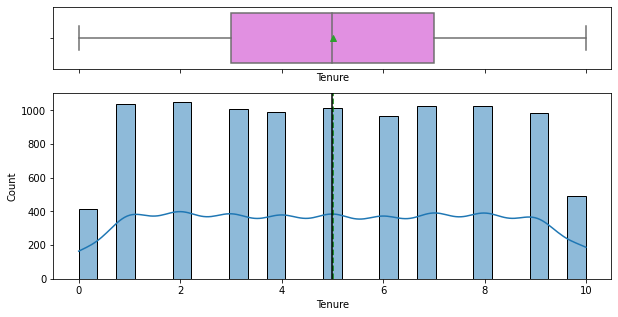

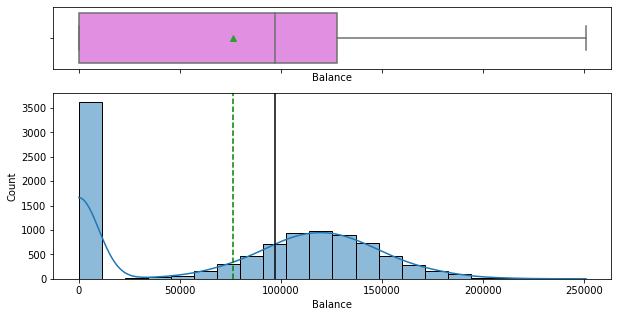

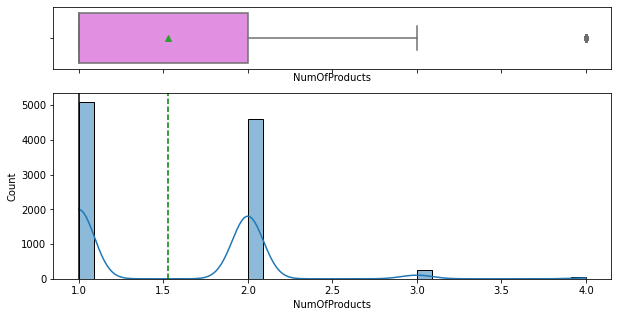

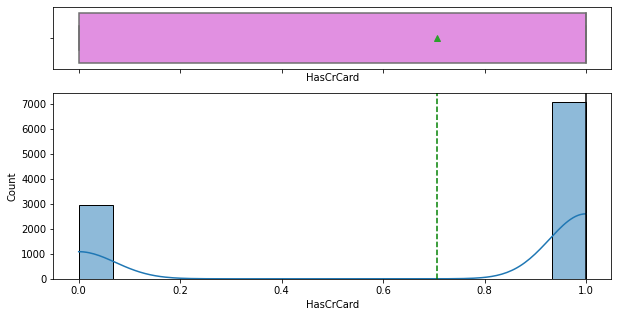

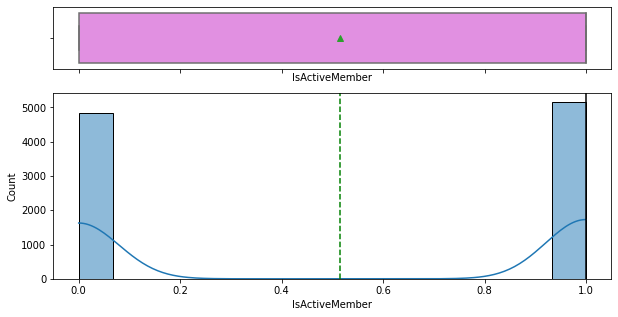

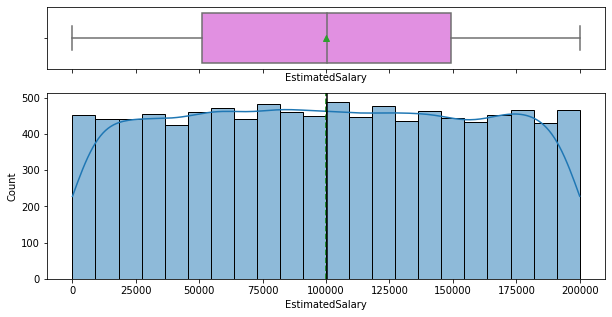

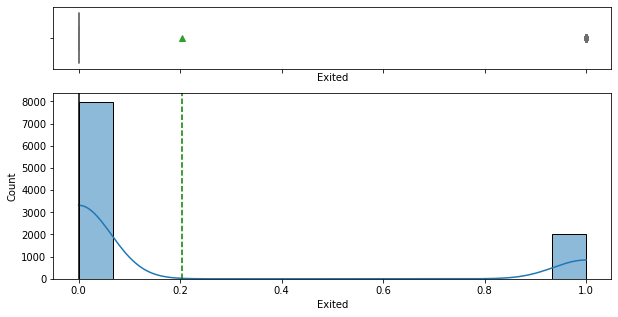

In [18]:
# Loop through numerical features and display histogram and boxplot
for col in num_cols:
  histogram_boxplot(df, col, kde=True, figsize=(10,5));

Notes:
- Skewness in data (i.e. Age is right skewed and credit score is left skewed)
- We see outliers in the distrobutions for some of the features such as age and credit score but I plan to keep them. The outliers are not unrealistic as we expect elderly people to have bank accounts and opt into their services
- Notice Balance has a large number of accounts with zero balance

### Categorical Features

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<Figure size 720x864 with 0 Axes>

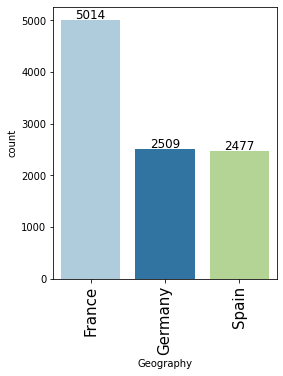

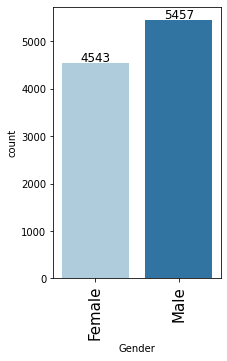

In [ ]:
# Loop through categorical features and display labeled barplots
plt.figure(figsize=(10,12))
for col in cat_cols[1:]:
  labeled_barplot(df, col);

Notes: 
- France has around twice as many customers as Germany and Spain
- Germany and Spain have similar number of cutomers
- Majority of the customers are male

## Bivariate Analysis

In [ ]:
# Calculating feature correlation to be used for the correlation matrix
df_corr = df.drop(['RowNumber','CustomerId'], axis=1).corr()

In [ ]:
# Create labels to make the Strong, Medium and Weak correlations more clear
# I will define strong correlation as > 0.75
# I will define medium correlation as > 0.50
# I will define weak correlation as > 0.25

labels = np.where(
    np.abs(df_corr) > 0.75, 
    'S', 
    np.where(np.abs(df_corr) > 0.5, 'M', 
            np.where(np.abs(df_corr) > 0.25, 'W', '')),
)

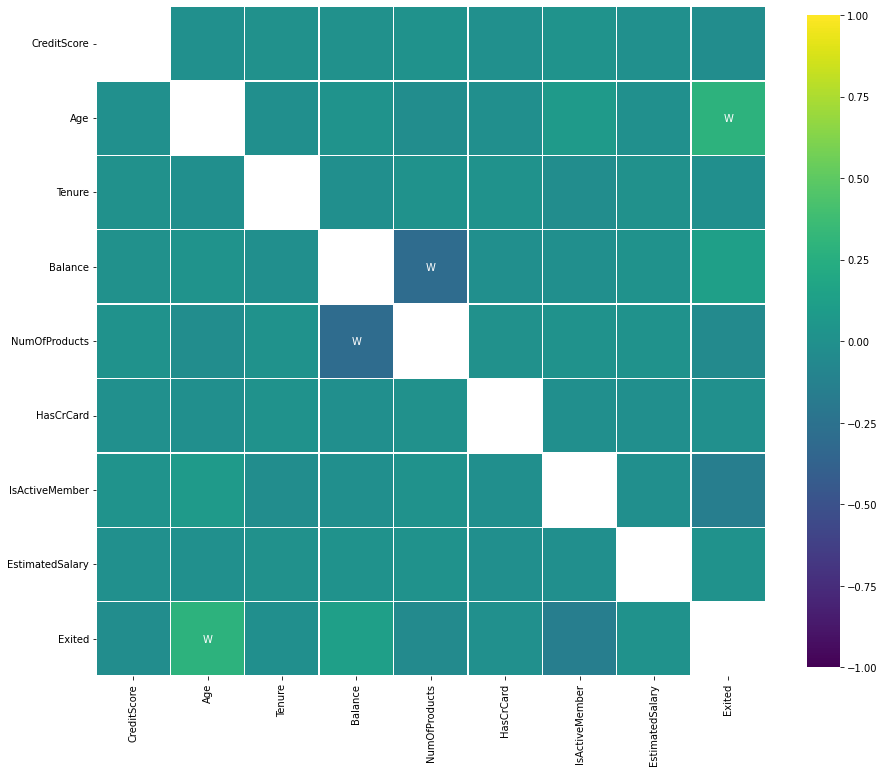

In [ ]:
# Plot correlation matrix with the diagonals masked
plt.figure(figsize=(15,15))
sns.heatmap(
    df_corr, 
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt='',
    linewidths=0.5,
    cmap='viridis',
    cbar_kws={'shrink':0.8},
    vmin=-1, 
    vmax=1
);

Notes: 
- From the heat map, we can see there are only two weak correlations within our feature set:
> - Age vs Exited and balance vs number of products

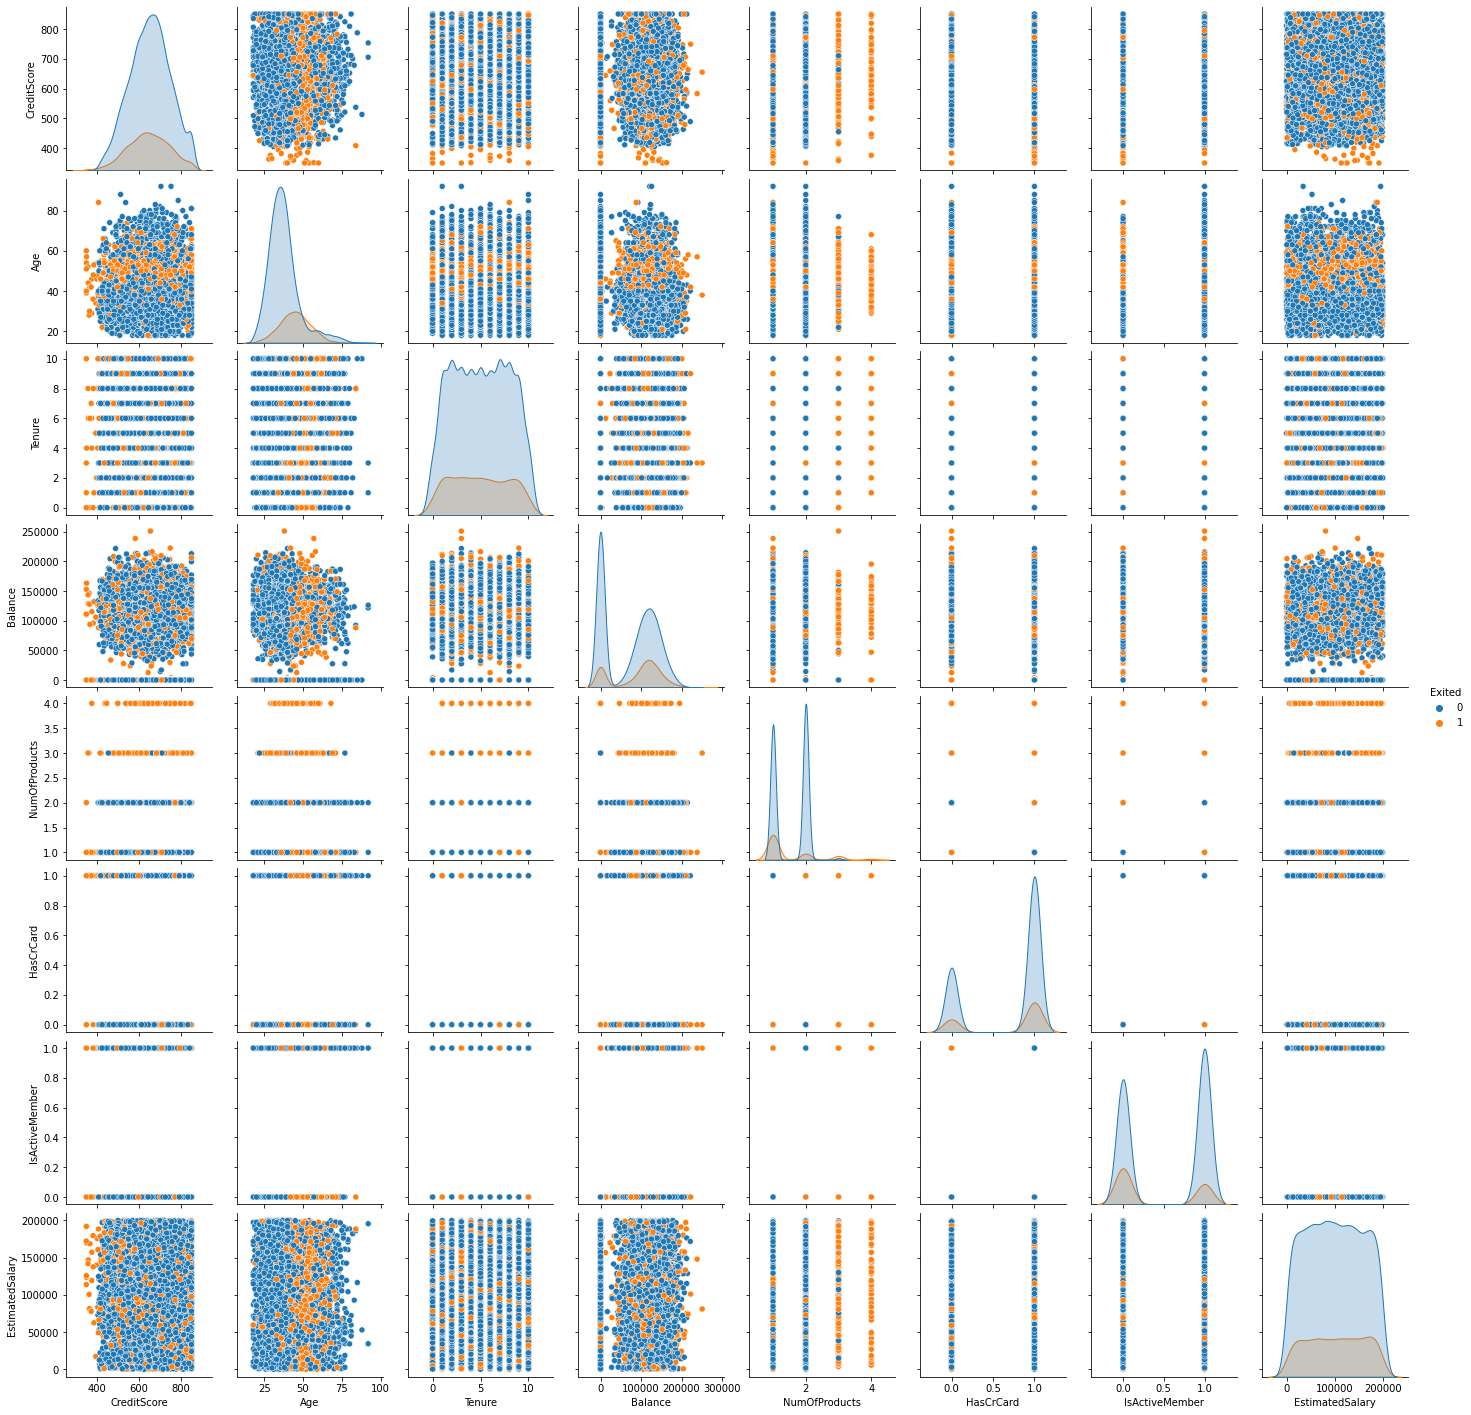

In [ ]:
# Let's take a deeper dive into the feature correlations with pair plots
sns.pairplot(data=df.drop(['RowNumber','CustomerId'], axis=1), hue='Exited', diag_kind='kde');

Notes:
- There aren't any bivariate correlations that are popping out from the pairplots. We see groupings of customers who exited but don't see a bivariate trend

### Target vs Categorical

In [ ]:
cat_cols.append('Surname')

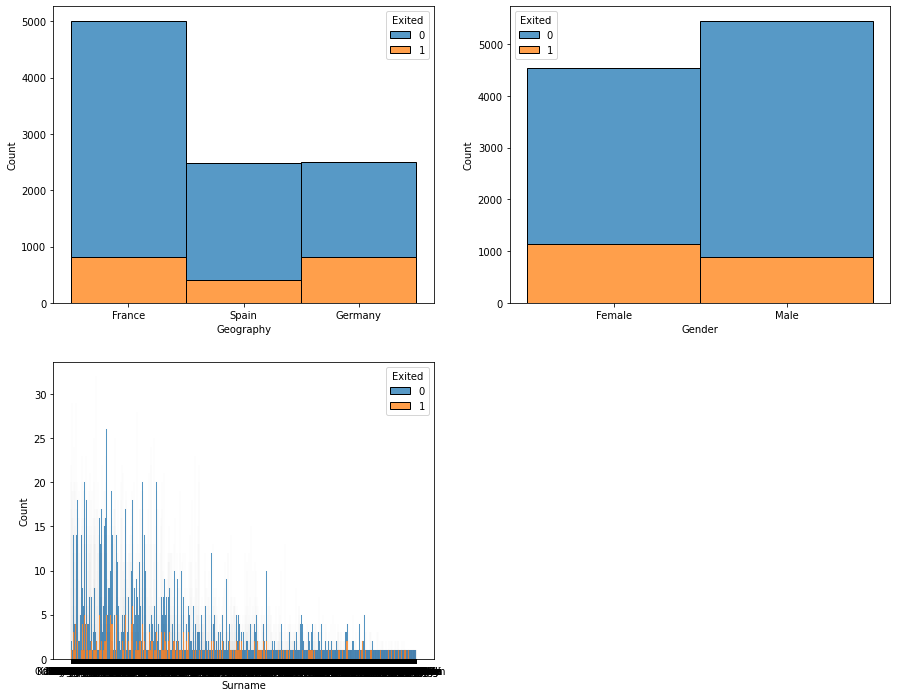

In [ ]:
# loop through categorical features and compare to see if we can characterize those who exit the bank
plt.figure(figsize=(15,12))
for i,item in enumerate(cat_cols):
  plt.subplot(2,2, i+1)
  sns.histplot(df, x=item, hue='Exited', multiple='stack');

Notes:
- France and Germany have the customers that exit the most
- Females exit the bank more than males
- Surnames is hard to view from this plot but you can observe that the more common surnames have more congregations of those who left

### Target vs Numerical

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

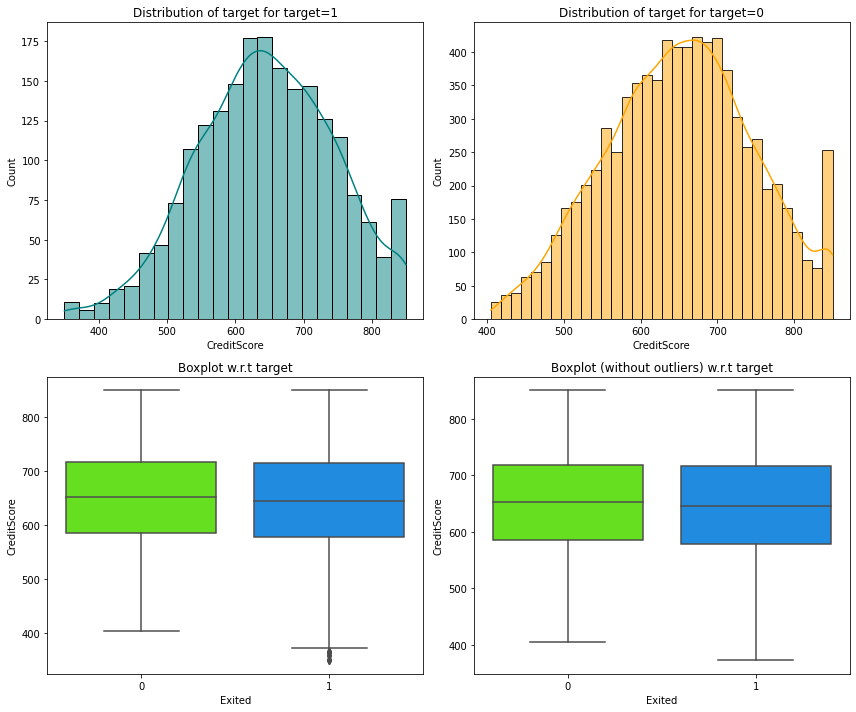

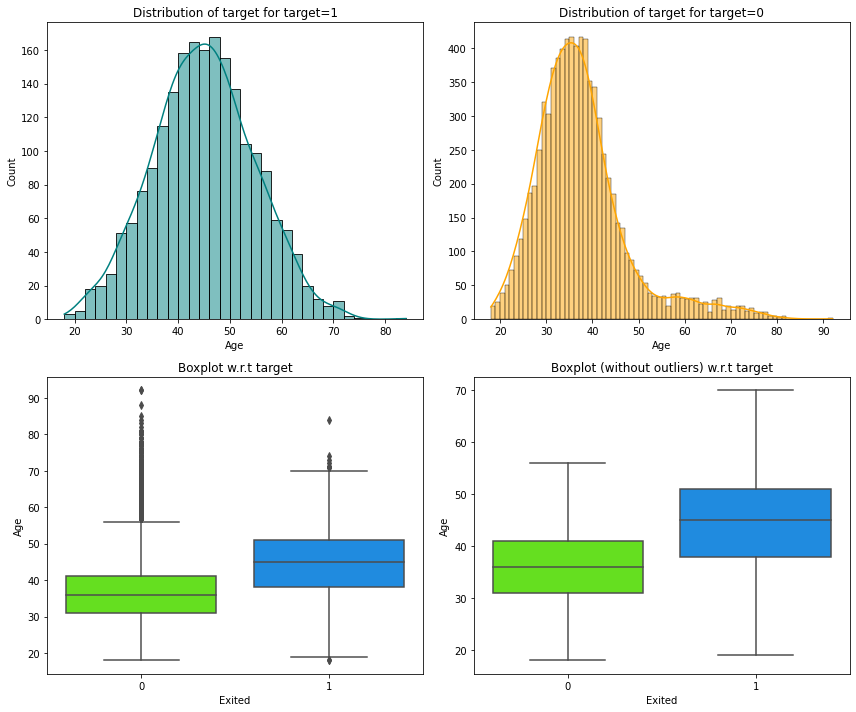

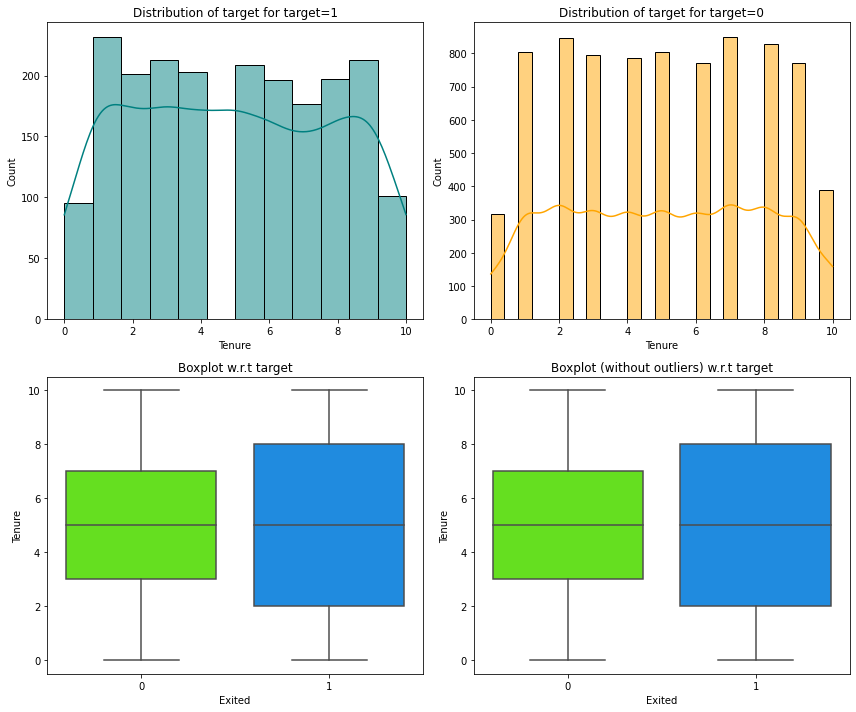

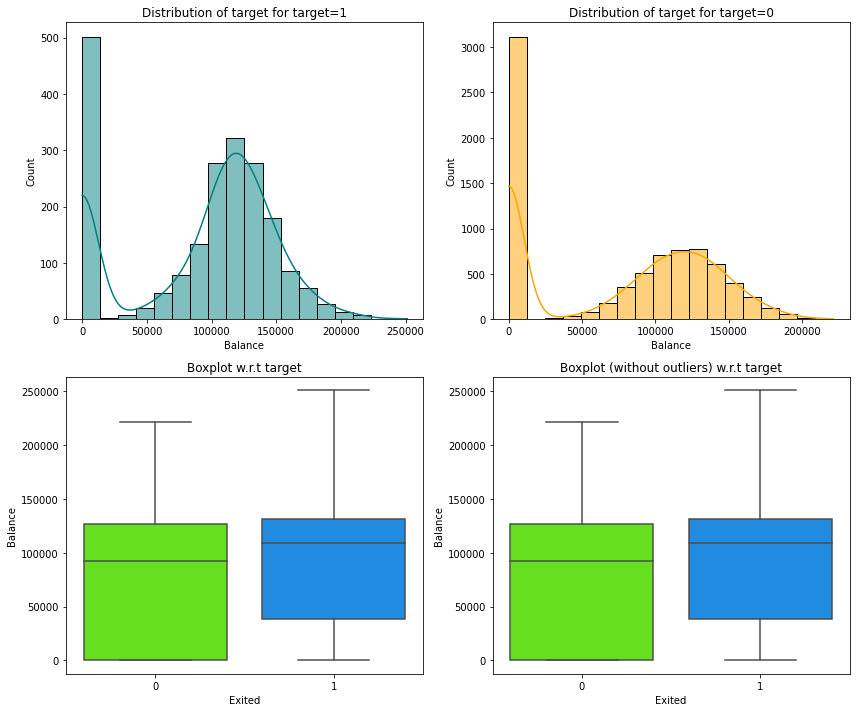

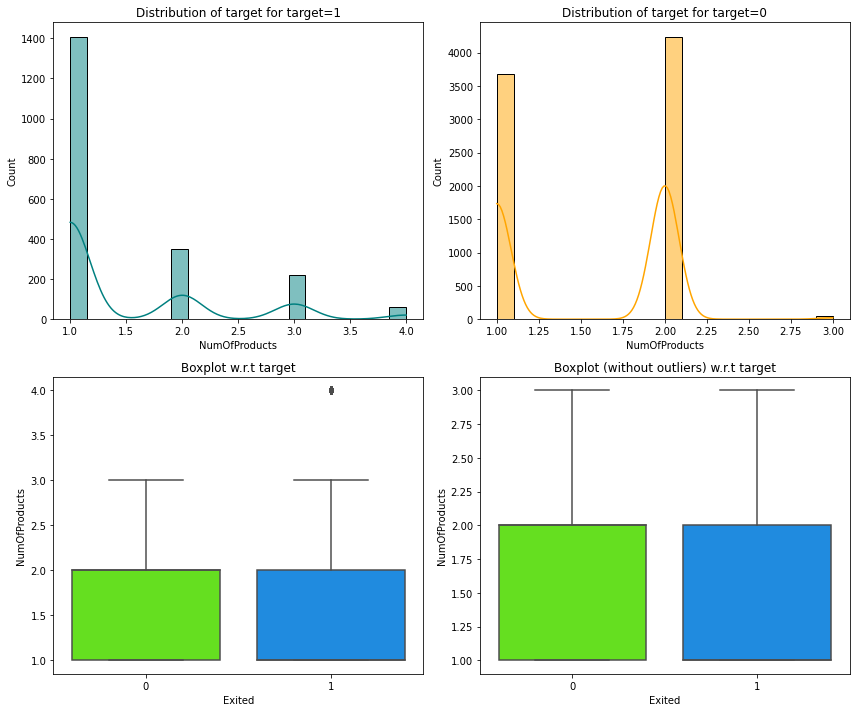

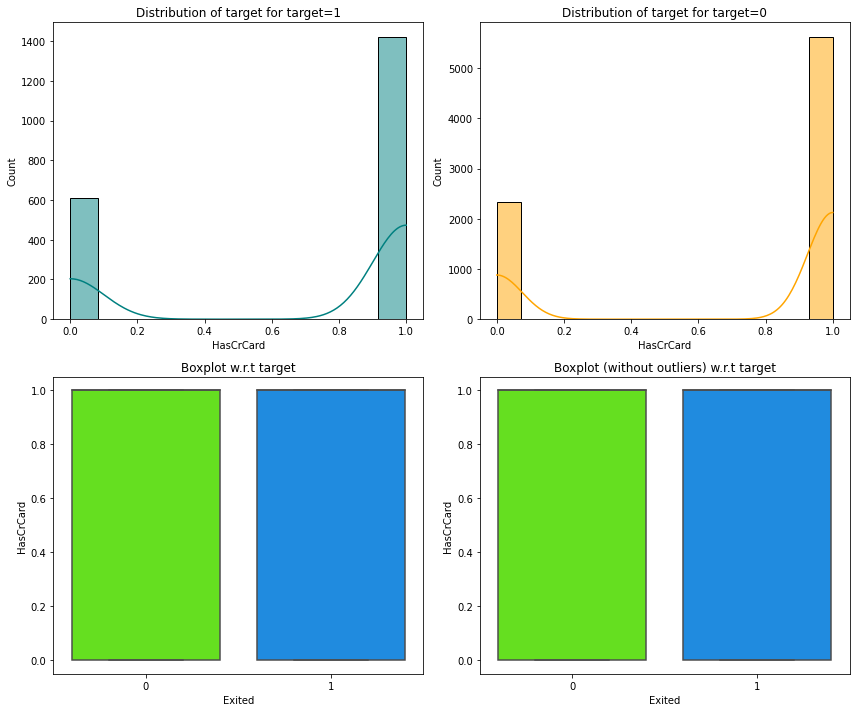

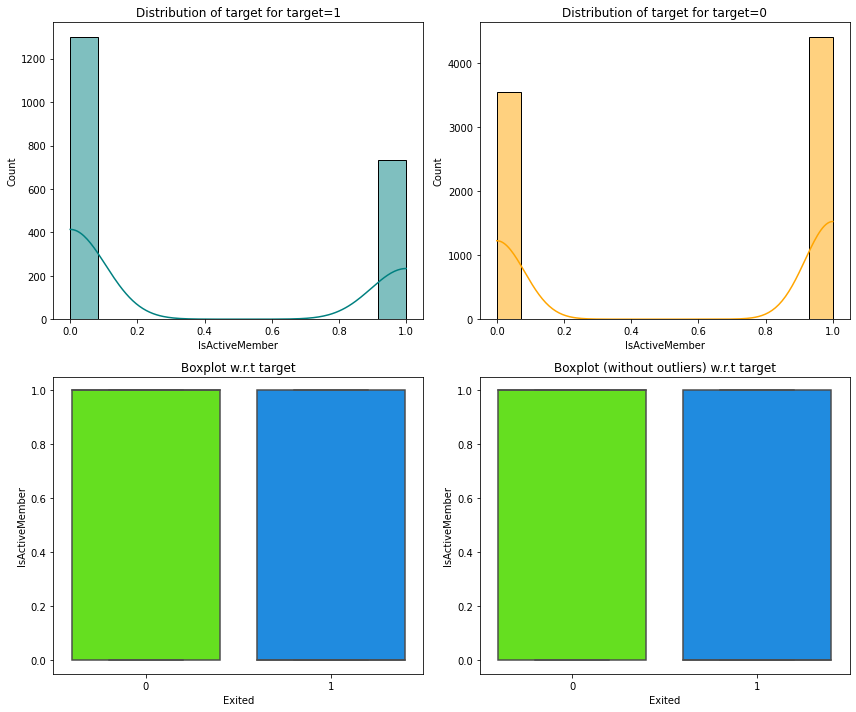

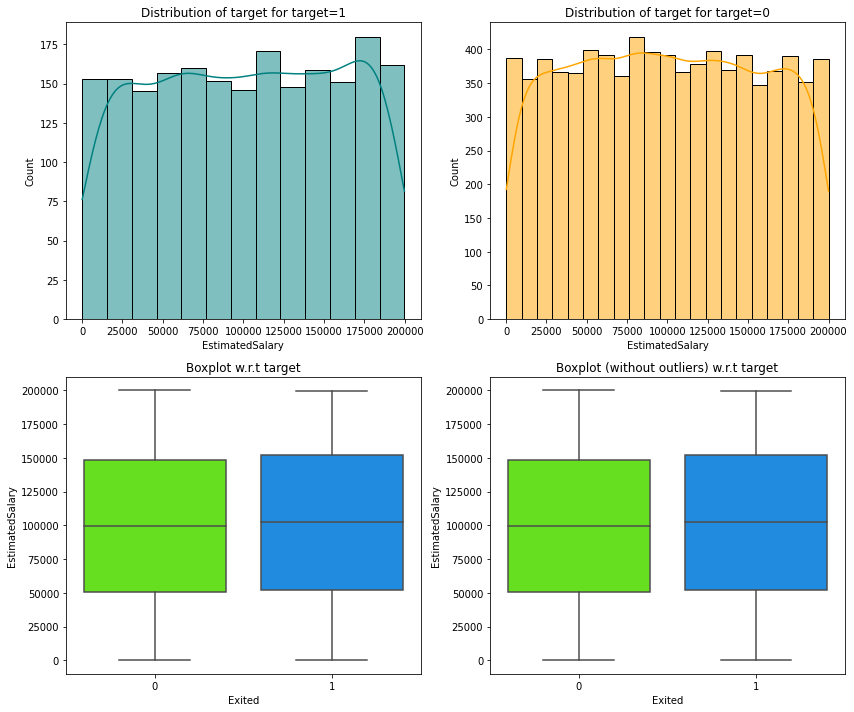

In [ ]:
# Loop through numerical features and compare vs target
# Removing our target column from our numerical list
num_cols.remove('Exited')

for item in num_cols:
  distribution_plot_wrt_target(df, item, 'Exited')

Notes:
- Credit score has similar distributions for those who stayed and left (skewed left, 50% are around the ~600-700 range)
- Age distributions differ for those who stayed and left. For those who left, we see a normal distribution with mean age around ~46. Those who stayed have a right skewed distribution and from the box plot their 50% age range is younger than those who left
- Similar distribution for tenure 
- Similar trend for balance too, but you can see that there’s a high count of zero balances for those who are existing customers and those who left and there’s overlap for the 50% range for both categories
- Existing customers most likely have 1-2 products with the bank, but those who left most often had one
- Similar distribution for has credit cards
- Similar trend for salaries

### Additional Characterization
This section will look at trends for each feature based on country and will be summarized in the Summary and Insight section.

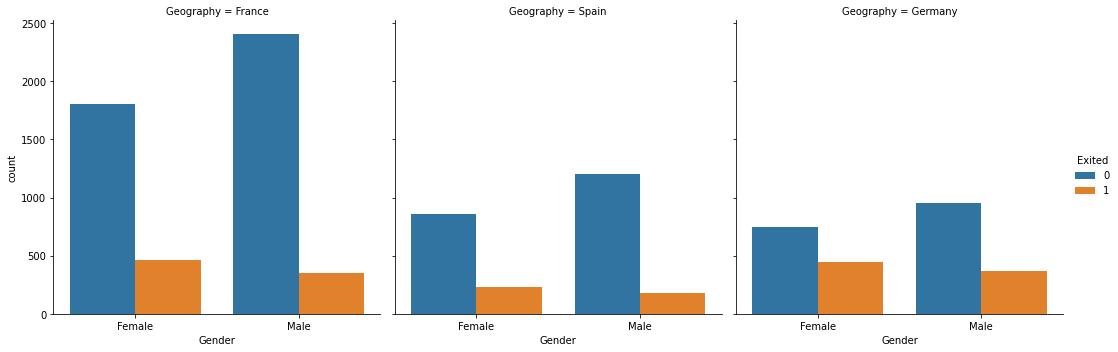

In [ ]:
# Countplot to see how customers from different geographical locations fair with staying with a bank
sns.catplot(x='Gender', hue='Exited', col='Geography', data=df, kind='count')

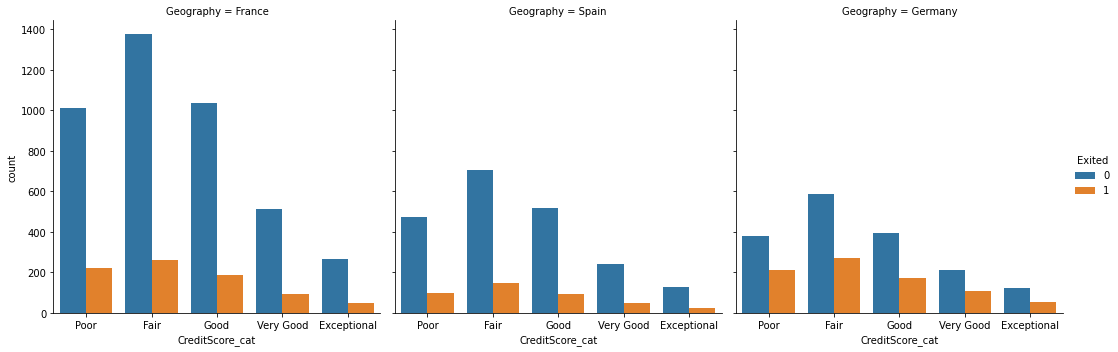

In [7]:
# Geography trend for credit score
'''
First I'm going to bin the scores. I'm binning according to how FICO bins credit scores
300-579 is Poor
580 - 669 is Fair
670 - 739 is Good
740 - 799 is Very Good
800 - 850 is Exceptional
'''
df['CreditScore_cat'] = pd.cut(df['CreditScore'],[300,580,670, 740,800, 850], labels=['Poor','Fair','Good','Very Good', 'Exceptional'])
sns.catplot(x='CreditScore_cat', hue='Exited', col='Geography', data=df, kind='count')

Note: Similar distributions for all three countries

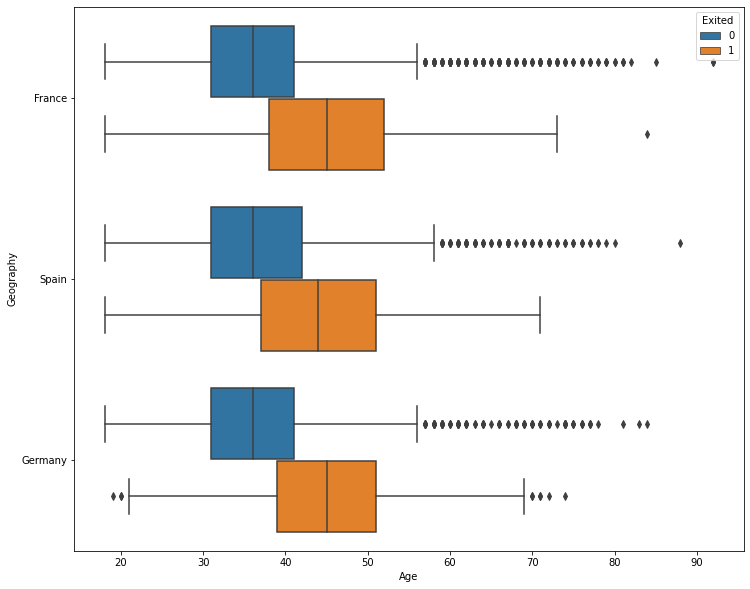

In [ ]:
# Geography and Age
plt.figure(figsize=(12,10))
sns.boxplot(data=df, x='Age', y='Geography', hue='Exited');

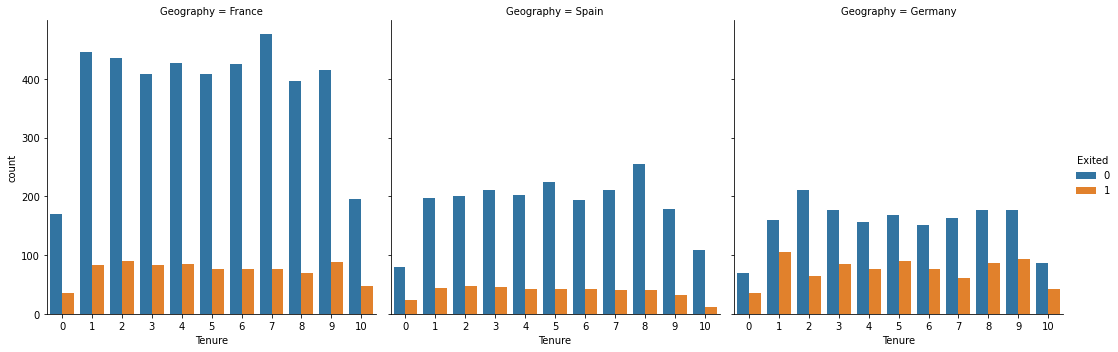

In [ ]:
# Geographical Tenure Profile
sns.catplot(x='Tenure', hue='Exited', col='Geography', data=df, kind='count')

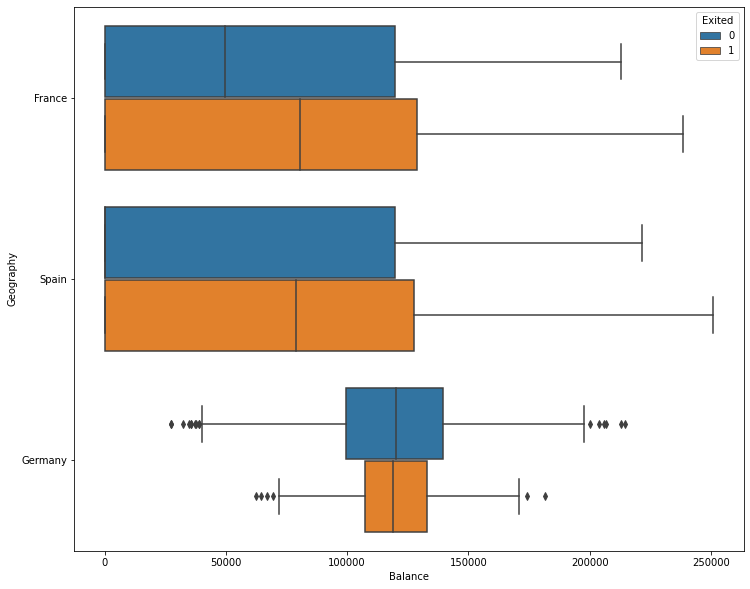

In [ ]:
# Geography and balance
plt.figure(figsize=(12,10))
sns.boxplot(data=df, x='Balance', y='Geography', hue='Exited');

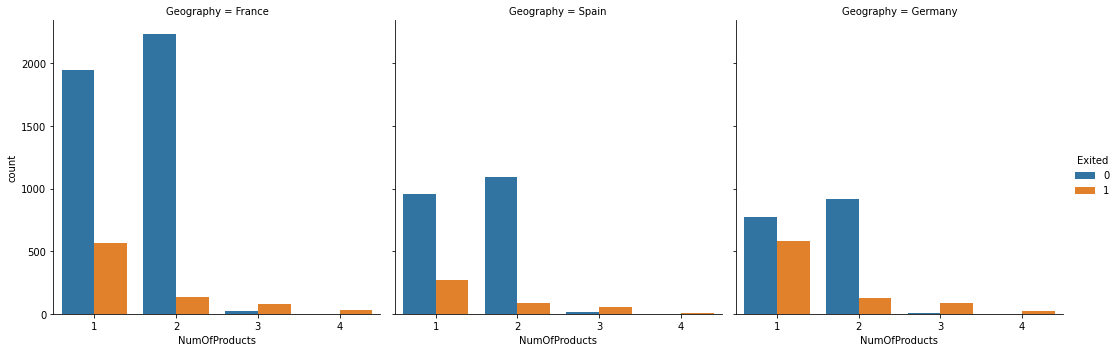

In [ ]:
# Geography and # of products
sns.catplot(x='NumOfProducts', hue='Exited', col='Geography', data=df, kind='count')

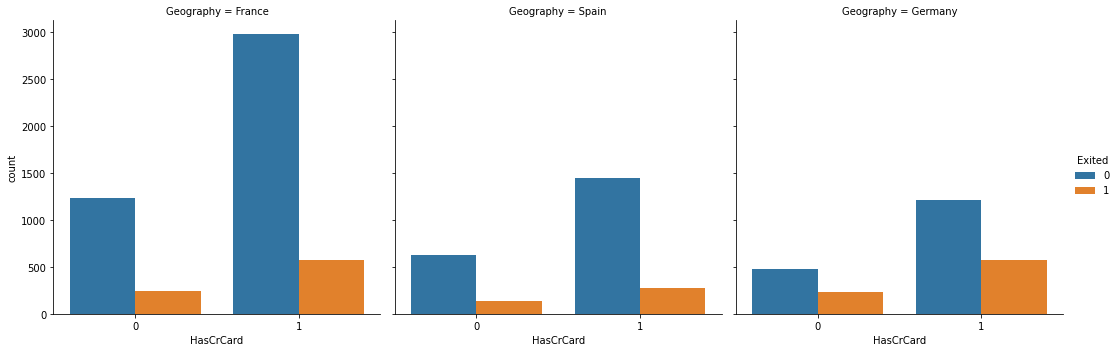

In [ ]:
# Geography and card
sns.catplot(x='HasCrCard', hue='Exited', col='Geography', data=df, kind='count')

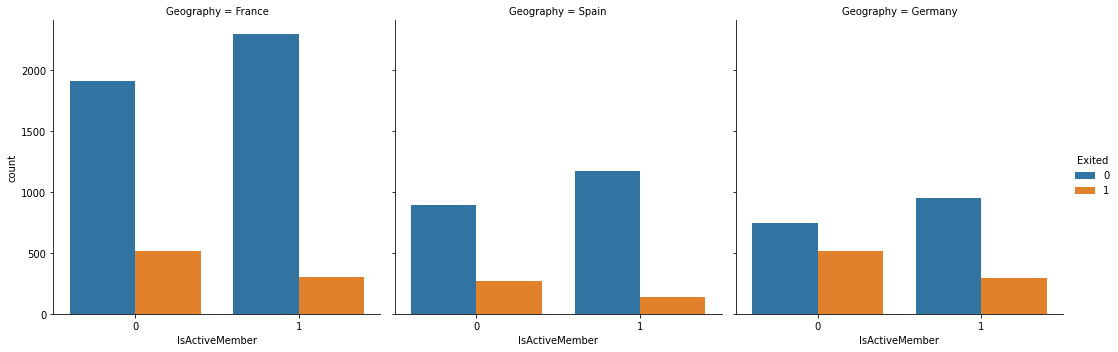

In [ ]:
# Geography and active member
sns.catplot(x='IsActiveMember', hue='Exited', col='Geography', data=df, kind='count')

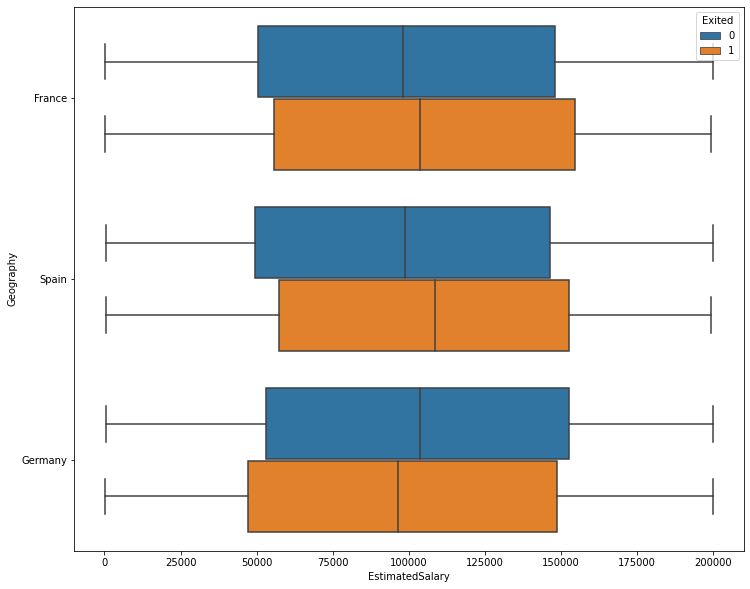

In [ ]:
# Geography and salary
plt.figure(figsize=(12,10))
sns.boxplot(data=df, x='EstimatedSalary', y='Geography', hue='Exited');

## EDA Summary and Insights

Observations from EDA:
- Average credit score is 650 but ranges from 350 to 850
- Average age of customer is 39yr, 50% of the customer base is from 32 to 44
- Customers on average have been with the bank for 5 years
- Average balance is a little less than \$76.5k, but we have an outlier around \$250,900
- Customers on average have more than 1 product
- 70% of customers have credit cards
- 51% are active members
- Average salary is \$100,090
- 20% of customers exited bank within 6 months

Characterization of customers from the three geographical locations. Note that the characterizations are very similar amongst the three so it can be generalized for the entire customer base. 

France:
- Majority of customers are male, but women have been more likely to exit the bank within 6 months
- Majority of customers have Fair credit
- Majority of those who leave have fair credit
- Younger customers (30-40yrs range) tend to stay as existing customers where as older customers (40-50yrs) tend to leave within the first 6 months
- 50% customers have balances from \$0 - \$125k
- Customers tend to have 2 products with the bank but those who left tend to have 1
- Existing customers tend to have a credit card, but those who left tend to not
- Tend to be active, inactive tend to leave
- Salary for 50%ers tend to be between \$50k - \$150k

Germany:
- Majority of customers are male, but women have been more likely to exit the bank within 6 months
- Majority of customers have Fair credit
- Majority of those who leave have fair credit
- Younger customers (30-40yrs range) tend to stay as existing customers where as older customers (40-50yrs) tend to leave within the first 6 months
- 50% customers have balances from \$0 - \$125k
- Customers tend to have 2 products with the bank but those who left tend to have 1
- Existing customers tend to have a credit card, but those who left tend to not
- Tend to be active, inactive tend to leave
- Salary for 50%ers tend to be between \$50k - \$150k

Spain:
- Majority of customers are male, but women have been more likely to exit the bank within 6 months
- Majority of customers have Fair credit
- Majority of those who leave have fair credit
- Younger customers (30-40yrs range) tend to stay as existing customers where as older customers (40-50yrs) tend to leave within the first 6 months
- 50% customers have balances from \$100k - \$140k
- Customers tend to have 2 products with the bank but those who left tend to have 1
- Existing customers tend to have a credit card, but those who left tend to not
- Tend to be active, inactive tend to leave
- Salary for 50%ers tend to be between \$50k - \$150k

# Data Pre-processing
- Split the target variable and predictors 
- Split the data into train and test 
- Rescale the data

In [8]:
# Dropping columns identified earlier
df.drop(['RowNumber','CustomerId','CreditScore_cat'],axis=1,inplace=True)

In [9]:
# Split Data into target and independent variables
X = df.drop('Exited',axis=1)
y = df['Exited']

In [10]:
# One Hot Encode our categorical features. 
X = pd.get_dummies(X, columns=['Surname','Geography','Gender'], drop_first=True)

In [11]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1,stratify = y)

In [12]:
# Check balance of our test and train sets
print('Training target class balance:')
print(y_train.value_counts(1))
print('--'*50)
print('Testing target class balance:')
print(y_test.value_counts(1))

Training target class balance:
0    0.79625
1    0.20375
Name: Exited, dtype: float64
----------------------------------------------------------------------------------------------------
Testing target class balance:
0    0.7965
1    0.2035
Name: Exited, dtype: float64


In [13]:
# Create list of features that we will scale. Selected Features with high magnitudes
# Thus why I did not include features such as 'Has credit card'
to_scale = ['CreditScore','Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Fit and transform training set
std_scaler = StandardScaler()
X_train[to_scale] = std_scaler.fit_transform(X_train[to_scale])

# Transfrom test set
X_test[to_scale] = std_scaler.transform(X_test[to_scale])

# Neural Network Modeling 
- Model building
- Model Performance Improvement
- Model Performance Evaluation

## Model 1 Baseline
- Build Neural Network
- Will investigate different different number of hidden layers and neurons in each layer before selecting one as our base model
- Metric selected for evaluation is Recall. There's two ways the model can be wrong:
> 1. Predicts a customer is going to leave but the customer doesn't
> 2. Predicts a customer is going to stay but they leave

> The cost of the second is much greater in this case so we want to minimize this and optimize our Recall score

### Model 1.0
This will be a baseline NN

In [14]:
# Clearing backend 
backend.clear_session()

# Fixing the seed 
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [15]:
# Initializing model
model1_0 = Sequential()
# Adding input layer with 64 nuerons, relu activation function, he_unifrom the weight initializer
model1_0.add(Dense(activation = 'relu', input_dim = X_train.shape[1],kernel_initializer='he_uniform', units=64))
# Adding hiddenlayer with 32 nuerons, relu activation func, he_uniform
model1_0.add(Dense(activation = 'relu',kernel_initializer='he_uniform', units=32))
# Adding output layer 
model1_0.add(Dense(1, activation = 'sigmoid')) 

In [16]:
model1_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                188352    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 190,465
Trainable params: 190,465
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Defining optimizer with Adam
opt = optimizers.Adam(lr=0.001)

In [18]:
# Compile model
model1_0.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Fit model on train and validation with 50 epochs
history = model1_0.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          verbose=1)

Epoch 1/50
200/200 [==============================] - 4s 4ms/step - loss: 0.4573 - accuracy: 0.8006 - val_loss: 0.4343 - val_accuracy: 0.8175
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3949 - accuracy: 0.8286 - val_loss: 0.4285 - val_accuracy: 0.8194
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3431 - accuracy: 0.8512 - val_loss: 0.4382 - val_accuracy: 0.8175
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.2743 - accuracy: 0.8902 - val_loss: 0.4948 - val_accuracy: 0.7869
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.2092 - accuracy: 0.9205 - val_loss: 0.5492 - val_accuracy: 0.8087
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.1557 - accuracy: 0.9408 - val_loss: 0.5977 - val_accuracy: 0.7887
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.1154 - accuracy: 0.9564 - val_loss: 0.6657 - val_accuracy: 0.7556
Epoch 

63/63 [==============================] - 0s 3ms/step - loss: 1.8006 - accuracy: 0.7585


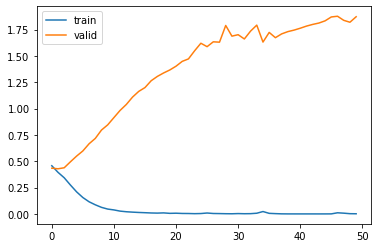

In [20]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model1_0.evaluate(X_test, y_test)

Notes:
First attempt with SGD actually created a model with 80% accuracy, but recall scores were bad. Second attempt with RMSprop created similar results as SGD. On this attempt with Adam, our accuracy dropped and you can see form the curve above that we're seeing overfitting

In [21]:
# Making predictions with our model with our test set
y_pred = model1_0.predict(X_test)
# Setting our threshold at 0.5 for now but will use ROC curve later to identify optimal threshold
y_pred = y_pred > 0.5

In [22]:
# Print our classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1593
           1       0.41      0.43      0.42       407

    accuracy                           0.76      2000
   macro avg       0.63      0.64      0.63      2000
weighted avg       0.76      0.76      0.76      2000



Accuracy isn't that good, but as we can see the recall for our target class is not the greatest. Below I'll print a confusion matrix to see how many true positives our model was able to predict

In [23]:
# Confusion matrix for model1_0
confusion_matrix(y_test, y_pred)

array([[1341,  252],
       [ 231,  176]])

In [26]:
hist['accuracy'].iloc[-1]

0.9996874928474426

From the confusion matrix, it looks like we only have 176 True Positives from our model

In [28]:
# Saving model 1.0 scores to dataframe, I'll replace with the model that outperforms
scores = pd.DataFrame({
    'Model 1':[
        metrics.accuracy_score(y_test,y_pred),
        hist['accuracy'].iloc[-1], 
        hist['val_accuracy'].iloc[-1],
        metrics.recall_score(y_test, y_pred),
        metrics.precision_score(y_test,y_pred), 
        metrics.f1_score(y_test, y_pred)
        ]
    }, 
    columns=['Model 1'], 
    index=['Test Accuracy', 'Train Accuracy', 'Val Accuracy','Recall', 'Precision','F1 Score']
)
scores

,Model 1
Test Accuracy,0.758500
Train Accuracy,0.999687
Val Accuracy,0.753750
Recall,0.432432
Precision,0.411215
F1 Score,0.421557


### Model 1.1
- Evaluate addition of another hidden layer

In [71]:
# Clearing backend 
backend.clear_session()

# Fixing the seed 
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Initializing model
model1_1 = Sequential()
# Adding input layer with 64 nuerons, relu activation function, he_unifrom the weight initializer
model1_1.add(Dense(activation = 'relu', input_dim = X_train.shape[1],kernel_initializer='he_uniform', units=64))
# Adding hiddenlayer with 32 nuerons, relu activation func, he_uniform
model1_1.add(Dense(activation = 'relu',kernel_initializer='he_uniform', units=32))
# Adding hiddenlayer with 32 nuerons, relu activation func, he_uniform
model1_1.add(Dense(activation = 'relu',kernel_initializer='he_uniform', units=32))
# Adding output layer 
model1_1.add(Dense(1, activation = 'sigmoid')) 

# Defining optimizer with Adam
opt = optimizers.Adam(lr=0.001)
# Compile model
model1_1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Fit model on train and validation with 50 epochs
history = model1_1.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          verbose=1)



Epoch 1/50
200/200 [==============================] - 3s 11ms/step - loss: 0.4633 - accuracy: 0.8033 - val_loss: 0.4326 - val_accuracy: 0.8175
Epoch 2/50
200/200 [==============================] - 1s 7ms/step - loss: 0.3917 - accuracy: 0.8303 - val_loss: 0.4280 - val_accuracy: 0.8263
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 0.3253 - accuracy: 0.8641 - val_loss: 0.4555 - val_accuracy: 0.7969
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 0.2422 - accuracy: 0.9020 - val_loss: 0.5375 - val_accuracy: 0.7812
Epoch 5/50
200/200 [==============================] - 1s 5ms/step - loss: 0.1667 - accuracy: 0.9358 - val_loss: 0.6224 - val_accuracy: 0.7869
Epoch 6/50
200/200 [==============================] - 1s 5ms/step - loss: 0.1110 - accuracy: 0.9589 - val_loss: 0.7415 - val_accuracy: 0.7613
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0690 - accuracy: 0.9744 - val_loss: 0.8109 - val_accuracy: 0.7538
Epoch

63/63 [==============================] - 0s 3ms/step - loss: 2.1892 - accuracy: 0.7660


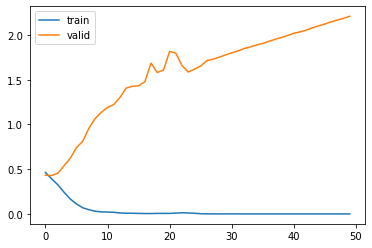

In [72]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model1_1.evaluate(X_test, y_test)

Seeing similar accuracy compared to our previous model and overfitting

In [74]:
# Making predictions with our model with our test set
y_pred = model1_1.predict(X_test)
# Setting our threshold at 0.5 for now but will use ROC curve later to identify optimal threshold
y_pred = y_pred > 0.5

# Print our classification report
print(classification_report(y_test,y_pred))

# Confusion matrix for model1_0
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1593
           1       0.42      0.39      0.40       407

    accuracy                           0.77      2000
   macro avg       0.63      0.63      0.63      2000
weighted avg       0.76      0.77      0.76      2000



array([[1374,  219],
       [ 249,  158]])

Our recall is worse than before

### Model 1.2
- Evaluate a different set up of input and hidden layers to determine what our baseline model is going to be

In [41]:
# Clearing backend 
backend.clear_session()

# Fixing the seed 
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Initializing model
model1_2 = Sequential()
# Adding input layer with 32 nuerons, relu activation function, he_unifrom the weight initializer
model1_2.add(Dense(activation = 'relu', input_dim = X_train.shape[1],kernel_initializer='he_uniform', units=16))
# Adding hiddenlayer with 64 nuerons, relu activation func, he_uniform
model1_2.add(Dense(activation = 'relu',kernel_initializer='he_uniform', units=32))
# Adding hiddenlayer with 64 nuerons, relu activation func, he_uniform
model1_2.add(Dense(activation = 'relu',kernel_initializer='he_uniform', units=32))
# Adding hiddenlayer with 16 nuerons, relu activation func, he_uniform
model1_2.add(Dense(activation = 'relu',kernel_initializer='he_uniform', units=16))
# Adding output layer 
model1_2.add(Dense(1, activation = 'sigmoid')) 

# Defining optimizer with Adam
opt = optimizers.Adam(lr=0.001)
# Compile model
model1_2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Fit model on train and validation with 50 epochs
history = model1_2.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          verbose=1)

Epoch 1/50
200/200 [==============================] - 2s 8ms/step - loss: 0.4907 - accuracy: 0.7842 - val_loss: 0.4330 - val_accuracy: 0.8163
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4009 - accuracy: 0.8269 - val_loss: 0.4214 - val_accuracy: 0.8275
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3547 - accuracy: 0.8483 - val_loss: 0.4417 - val_accuracy: 0.8188
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.2941 - accuracy: 0.8786 - val_loss: 0.4922 - val_accuracy: 0.7837
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.2362 - accuracy: 0.9053 - val_loss: 0.5849 - val_accuracy: 0.7906
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.1936 - accuracy: 0.9228 - val_loss: 0.6401 - val_accuracy: 0.7769
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.1580 - accuracy: 0.9370 - val_loss: 0.7021 - val_accuracy: 0.7756
Epoch 

63/63 [==============================] - 0s 3ms/step - loss: 2.5212 - accuracy: 0.7560


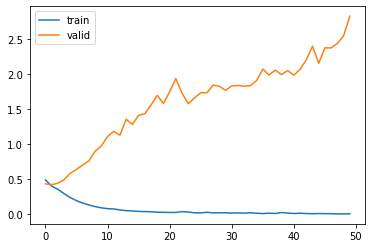

In [42]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model1_2.evaluate(X_test, y_test)

Slightly better accuracy but we can see from the curve above that we are overfitting

In [43]:
# Making predictions with our model with our test set
y_pred = model1_2.predict(X_test)
# Setting our threshold at 0.5 for now but will use ROC curve later to identify optimal threshold
y_pred = y_pred > 0.5

# Print our classification report
print(classification_report(y_test,y_pred))

# Confusion matrix for model1_0
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1593
           1       0.41      0.47      0.44       407

    accuracy                           0.76      2000
   macro avg       0.64      0.65      0.64      2000
weighted avg       0.77      0.76      0.76      2000



array([[1321,  272],
       [ 216,  191]])

Recall is better than model 1.1 but not as good as model 1.0. I will keep our baseline simple and go forward with model 1.0

## Model Improvements
- Comment on which metric is right for model performance evaluation and why? 
- Find the optimal threshold using ROC-AUC curves 
- Comment on model performance 
- Can model performance be improved? check and comment 
- Build another model to implement these improvements 
- Include all the model which were trained to reach at the final one

### Evaluation Metric
- Metric selected for evaluation is Recall. There's two ways the model can be wrong:
> 1. Predicts a customer is going to leave but the customer doesn't
> 2. Predicts a customer is going to stay but they leave

> The cost of the second is much greater in this case so we want to minimize this and optimize our Recall score

### Optimal Threshold
This section will calculate the optimal threshold using the ROC curve for model 1

In [29]:
# Function to plot ROC curve and identify optimal threshold
def plot_roc(model, X_train, Y_train):
  '''
  Optimal threshold as per AUC-ROC curve
  The optimal cut off would be where tpr is high and fpr is low
  '''
  # Calculate Predictions
  prediction = model.predict(X_train)
  # Calculate false pos rate, true pos rate and threshold
  fpr, tpr, thresholds = metrics.roc_curve(y_train, prediction)

  # Calculate our optimal threshold based of our approach above
  optimal_idx = np.argmax(tpr - fpr)
  optimal_threshold_auc_roc = thresholds[optimal_idx]
  print(f'The optimal threshold from the ROC Curve:\n {optimal_threshold_auc_roc}')

  # Print ROC Curve
  plt.figure(figsize=(15,5))
  plt.plot(fpr,tpr)
  plt.plot([0,1],[0,1],'r--')
  plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Best')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()
  return optimal_threshold_auc_roc

The optimal threshold from the ROC Curve:
 0.16618135571479797


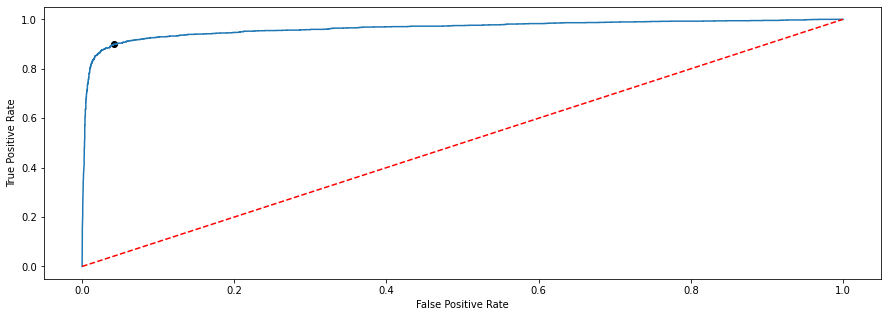

In [30]:
# Calculate Optimal Threshold and printing ROC curve
threshold_m1 = plot_roc(model1_0, X_train, y_train)

In [26]:
# Rerunning Model 1 and using the optimal threshold to make predictions

Epoch 1/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4573 - accuracy: 0.8006 - val_loss: 0.4343 - val_accuracy: 0.8175
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3949 - accuracy: 0.8286 - val_loss: 0.4285 - val_accuracy: 0.8194
Epoch 3/50
200/200 [==============================] - 1s 6ms/step - loss: 0.3431 - accuracy: 0.8512 - val_loss: 0.4382 - val_accuracy: 0.8175
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.2743 - accuracy: 0.8902 - val_loss: 0.4948 - val_accuracy: 0.7869
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.2092 - accuracy: 0.9205 - val_loss: 0.5492 - val_accuracy: 0.8087
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.1557 - accuracy: 0.9408 - val_loss: 0.5977 - val_accuracy: 0.7887
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.1154 - accuracy: 0.9564 - val_loss: 0.6657 - val_accuracy: 0.7556
Epoch 

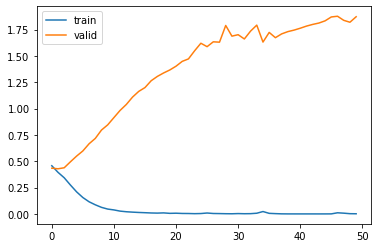

In [31]:
# Clearing backend 
backend.clear_session()

# Fixing the seed 
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Initializing model
model1_0 = Sequential()
# Adding input layer with 64 nuerons, relu activation function, he_unifrom the weight initializer
model1_0.add(Dense(activation = 'relu', input_dim = X_train.shape[1],kernel_initializer='he_uniform', units=64))
# Adding hiddenlayer with 32 nuerons, relu activation func, he_uniform
model1_0.add(Dense(activation = 'relu',kernel_initializer='he_uniform', units=32))
# Adding output layer 
model1_0.add(Dense(1, activation = 'sigmoid')) 

# Defining optimizer with Adam
opt = optimizers.Adam(lr=0.001)

# Compile model
model1_0.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Fit model on train and validation with 50 epochs
history = model1_0.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          verbose=1)

# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model1_0.evaluate(X_test, y_test)

In [32]:
# Making predictions with our model with our test set
y_pred = model1_0.predict(X_test)
# Setting to optimal threshold
y_pred = y_pred > threshold_m1

# Print our classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1593
           1       0.39      0.50      0.44       407

    accuracy                           0.74      2000
   macro avg       0.62      0.65      0.63      2000
weighted avg       0.77      0.74      0.75      2000



In [33]:
# Saving model performance to our dataframe 
scores['Opt Threshold'] = pd.DataFrame({
    'Opt Threshold':[
        metrics.accuracy_score(y_test,y_pred),
        hist['accuracy'].iloc[-1], 
        hist['val_accuracy'].iloc[-1],
        metrics.recall_score(y_test, y_pred),
        metrics.precision_score(y_test,y_pred), 
        metrics.f1_score(y_test, y_pred)
        ]
    }, 
    columns=['Opt Threshold'], 
    index=['Test Accuracy', 'Train Accuracy', 'Val Accuracy','Recall', 'Precision','F1 Score']
)
scores

,Model 1,Opt Threshold
Test Accuracy,0.758500,0.737500
Train Accuracy,0.999687,0.999687
Val Accuracy,0.753750,0.753750
Recall,0.432432,0.498771
Precision,0.411215,0.387405
F1 Score,0.421557,0.436090


With the optimal threshold, we can see our recall score improved. However, our model is still overfitting based off our loss curve. To reduce overfitting, I'm going to investigate batch normalization, drop out and early stopping

### Batch Normalization

Epoch 1/50
200/200 [==============================] - 2s 5ms/step - loss: 0.5122 - accuracy: 0.7572 - val_loss: 0.4768 - val_accuracy: 0.7906
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3376 - accuracy: 0.8611 - val_loss: 0.4456 - val_accuracy: 0.7969
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.2313 - accuracy: 0.9141 - val_loss: 0.4245 - val_accuracy: 0.8106
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.1459 - accuracy: 0.9506 - val_loss: 0.5135 - val_accuracy: 0.7994
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.0926 - accuracy: 0.9700 - val_loss: 0.5569 - val_accuracy: 0.8062
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.0614 - accuracy: 0.9827 - val_loss: 0.6205 - val_accuracy: 0.7837
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.0483 - accuracy: 0.9884 - val_loss: 0.6516 - val_accuracy: 0.7925
Epoch 

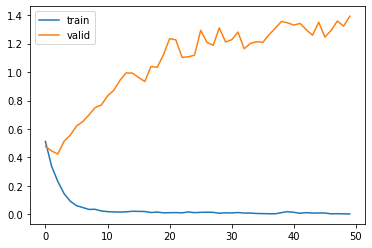

In [34]:
# Clearing backend 
backend.clear_session()

# Fixing the seed 
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Initializing model
model = Sequential()
# Adding input layer with 64 nuerons, relu activation function, he_unifrom the weight initializer
model.add(Dense(activation = 'relu', input_dim = X_train.shape[1],kernel_initializer='he_uniform', units=64))
# Add batch norm after input layer
#model.add(BatchNormalization())
# Adding hiddenlayer with 32 nuerons, relu activation func, he_uniform
model.add(Dense(activation = 'relu',kernel_initializer='he_uniform', units=32))
# Add batch norm after hidden layer
model.add(BatchNormalization())
# Adding output layer 
model.add(Dense(1, activation = 'sigmoid')) 

# Defining optimizer with Adam
opt = optimizers.Adam(lr=0.001)

# Compile model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Fit model on train and validation with 50 epochs
history = model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          verbose=1)

# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

We can see that batch normalization helped with overfitting compared to our baseline but the model is still overfitting. I also explored batch normaliztion after the hidden layer and that resulted in a similar performance and swithced which layer to normalize after. I opted to stick with one layer of batch normalization prior to our output layer which had the lowest loss of the three

The optimal threshold from the ROC Curve:
 0.16618135571479797


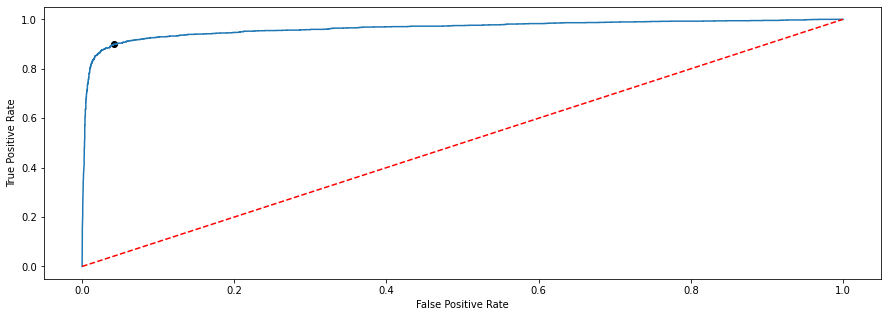

In [35]:
# Calculate Optimal Threshold and printing ROC curve
threshold = plot_roc(model1_0, X_train, y_train)

Same threshold as our original optimal

In [36]:
# Making predictions with our model with our test set
y_pred = model.predict(X_test)
# Setting to optimal threshold
y_pred = y_pred > threshold

# Print our classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1593
           1       0.52      0.52      0.52       407

    accuracy                           0.80      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.80      0.80      0.80      2000



In [37]:
# Saving model performance to our dataframe 
scores['Batch Norm'] = pd.DataFrame({
    'Batch Norm':[
        metrics.accuracy_score(y_test,y_pred),
        hist['accuracy'].iloc[-1], 
        hist['val_accuracy'].iloc[-1],
        metrics.recall_score(y_test, y_pred),
        metrics.precision_score(y_test,y_pred), 
        metrics.f1_score(y_test, y_pred)
        ]
    }, 
    columns=['Batch Norm'], 
    index=['Test Accuracy', 'Train Accuracy', 'Val Accuracy','Recall', 'Precision','F1 Score']
)
scores

,Model 1,Opt Threshold,Batch Norm
Test Accuracy,0.758500,0.737500,0.803000
Train Accuracy,0.999687,0.999687,0.999062
Val Accuracy,0.753750,0.753750,0.803750
Recall,0.432432,0.498771,0.518428
Precision,0.411215,0.387405,0.515892
F1 Score,0.421557,0.436090,0.517157


Improved our accuracy and recall score but we're still overfitting

### Dropout


Epoch 1/50
200/200 [==============================] - 1s 5ms/step - loss: 0.5551 - accuracy: 0.7597 - val_loss: 0.4614 - val_accuracy: 0.7906
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4962 - accuracy: 0.7959 - val_loss: 0.4475 - val_accuracy: 0.7906
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4834 - accuracy: 0.7981 - val_loss: 0.4445 - val_accuracy: 0.7906
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4734 - accuracy: 0.7967 - val_loss: 0.4453 - val_accuracy: 0.7906
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4604 - accuracy: 0.8000 - val_loss: 0.4430 - val_accuracy: 0.7906
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4607 - accuracy: 0.7992 - val_loss: 0.4454 - val_accuracy: 0.7906
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4453 - accuracy: 0.8009 - val_loss: 0.4434 - val_accuracy: 0.7906
Epoch 

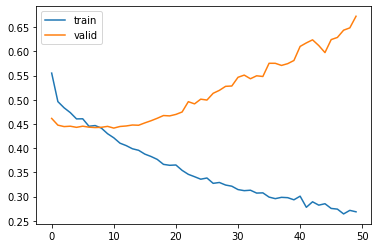

In [38]:
# Clearing backend 
backend.clear_session()

# Fixing the seed 
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Initializing model
model = Sequential()
# Adding input layer with 64 nuerons, relu activation function, he_unifrom the weight initializer
model.add(Dense(activation = 'relu', input_dim = X_train.shape[1],kernel_initializer='he_uniform', units=64))
# Add droput after input layer
model.add(Dropout(0.8))
# Adding hiddenlayer with 32 nuerons, relu activation func, he_uniform
model.add(Dense(activation = 'relu',kernel_initializer='he_uniform', units=32))
model.add(Dropout(0.8))
# Adding output layer 
model.add(Dense(1, activation = 'sigmoid')) 

# Defining optimizer with Adam
opt = optimizers.Adam(lr=0.001)

# Compile model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Fit model on train and validation with 50 epochs
history = model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          verbose=1)

# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

The optimal threshold from the ROC Curve:
 0.16618135571479797


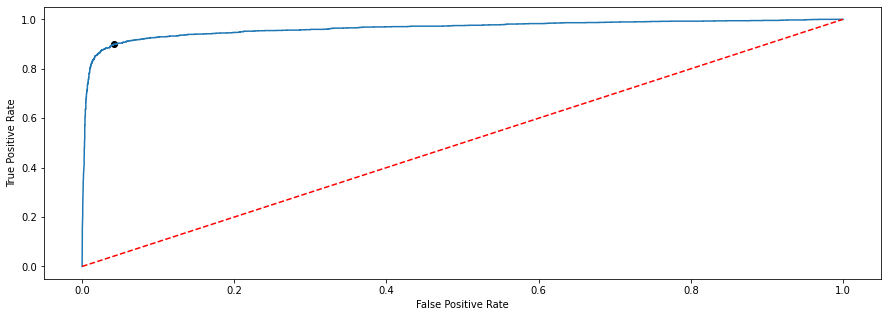

In [39]:
# Double check Optimal Threshold and print ROC curve
threshold = plot_roc(model1_0, X_train, y_train)

Same threshold as above

In [40]:
# Making predictions with our model with our test set
y_pred = model.predict(X_test)
# Setting to optimal threshold
y_pred = y_pred > threshold

# Print our classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76      1593
           1       0.33      0.65      0.44       407

    accuracy                           0.66      2000
   macro avg       0.61      0.66      0.60      2000
weighted avg       0.77      0.66      0.69      2000



In [41]:
scores['Dropout'] = pd.DataFrame({
    'Dropout':[
        metrics.accuracy_score(y_test,y_pred),
        hist['accuracy'].iloc[-1], 
        hist['val_accuracy'].iloc[-1],
        metrics.recall_score(y_test, y_pred),
        metrics.precision_score(y_test,y_pred), 
        metrics.f1_score(y_test, y_pred)
        ]
    }, 
    columns=['Dropout'], 
    index=['Test Accuracy', 'Train Accuracy', 'Val Accuracy','Recall', 'Precision','F1 Score']
)
scores

,Model 1,Opt Threshold,Batch Norm,Dropout
Test Accuracy,0.758500,0.737500,0.803000,0.664000
Train Accuracy,0.999687,0.999687,0.999062,0.866406
Val Accuracy,0.753750,0.753750,0.803750,0.806875
Recall,0.432432,0.498771,0.518428,0.653563
Precision,0.411215,0.387405,0.515892,0.333752
F1 Score,0.421557,0.436090,0.517157,0.441860


Having two layers of drop out worked better than one but I want to investigate if we see any improvements with having different rates of drop outs below. Still see the model overfitting but relative to our other models, we're seeing better generalization so I want to dig deeper and see if we can find a better combination of drop out rates

In [49]:
# Calculating our current differential 
diff = np.absolute(hist['accuracy'].iloc[-1] - hist['val_accuracy'].iloc[-1])

In [52]:
# Investigate if we can get better performance with two dropout layers with varying rate of drop out
drop1 = [0.5, 0.6, 0.7, 0.8, 0.9]
drop2 = [0.5, 0.6, 0.7, 0.8, 0.9]
# Variable to track accuracy. Initializing to a small number that's greater than the current differential
diff = 0.10
opt_drate = [0,0]

for d1 in drop1:
  for d2 in drop2:
    # Clearing backend 
    backend.clear_session()

    # Fixing the seed 
    np.random.seed(42)
    import random
    random.seed(42)
    tf.random.set_seed(42)

    # Initializing model
    model = Sequential()
    # Adding input layer with 64 nuerons, relu activation function, he_unifrom the weight initializer
    model.add(Dense(activation = 'relu', input_dim = X_train.shape[1],kernel_initializer='he_uniform', units=64))
    # Add droput after input layer
    model.add(Dropout(d1))
    # Adding hiddenlayer with 32 nuerons, relu activation func, he_uniform
    model.add(Dense(activation = 'relu',kernel_initializer='he_uniform', units=32))
    model.add(Dropout(d2))
    # Adding output layer 
    model.add(Dense(1, activation = 'sigmoid')) 

    # Defining optimizer with Adam
    opt = optimizers.Adam(lr=0.001)

    # Compile model
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    # Fit model on train and validation with 50 epochs
    history = model.fit(X_train, y_train,           
              validation_split=0.2,
              epochs=50,
              verbose=1);
    # Saving Results to dataframe
    if np.absolute(hist['accuracy'].iloc[-1] - hist['val_accuracy'].iloc[-1]) < diff:
      diff = np.absolute(hist['accuracy'].iloc[-1] - hist['val_accuracy'].iloc[-1])
      opt_drate[0] = d1
      opt_drate[1] = d2
      print(f'opt droprate1 is {d1}')
      print(f'opt droprate2 is {d2}')

Epoch 1/50
200/200 [==============================] - 2s 9ms/step - loss: 0.4874 - accuracy: 0.7914 - val_loss: 0.4393 - val_accuracy: 0.7919
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 0.4362 - accuracy: 0.8059 - val_loss: 0.4347 - val_accuracy: 0.8094
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4234 - accuracy: 0.8175 - val_loss: 0.4309 - val_accuracy: 0.8138
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3987 - accuracy: 0.8292 - val_loss: 0.4367 - val_accuracy: 0.8181
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3728 - accuracy: 0.8434 - val_loss: 0.4411 - val_accuracy: 0.8275
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3415 - accuracy: 0.8555 - val_loss: 0.4619 - val_accuracy: 0.8188
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3097 - accuracy: 0.8686 - val_loss: 0.4650 - val_accuracy: 0.8150
Epoch 

Looking through the output, it looks like drop rates of 0.9 for both layers gives us solid scores

Epoch 1/50
200/200 [==============================] - 2s 6ms/step - loss: 0.6232 - accuracy: 0.7241 - val_loss: 0.5301 - val_accuracy: 0.7906
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 0.5543 - accuracy: 0.7883 - val_loss: 0.4999 - val_accuracy: 0.7906
Epoch 3/50
200/200 [==============================] - 1s 6ms/step - loss: 0.5329 - accuracy: 0.7944 - val_loss: 0.4900 - val_accuracy: 0.7906
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 0.5165 - accuracy: 0.7970 - val_loss: 0.4835 - val_accuracy: 0.7906
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5107 - accuracy: 0.7970 - val_loss: 0.4770 - val_accuracy: 0.7906
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5074 - accuracy: 0.7969 - val_loss: 0.4778 - val_accuracy: 0.7906
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4963 - accuracy: 0.7981 - val_loss: 0.4728 - val_accuracy: 0.7906
Epoch 

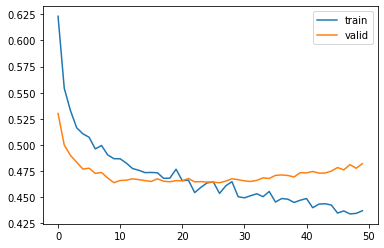

In [54]:
# Run with new drop rates
# Clearing backend 
backend.clear_session()

# Fixing the seed 
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Initializing model
model = Sequential()
# Adding input layer with 64 nuerons, relu activation function, he_unifrom the weight initializer
model.add(Dense(activation = 'relu', input_dim = X_train.shape[1],kernel_initializer='he_uniform', units=64))
# Add droput after input layer
model.add(Dropout(0.9))
# Adding hiddenlayer with 32 nuerons, relu activation func, he_uniform
model.add(Dense(activation = 'relu',kernel_initializer='he_uniform', units=32))
model.add(Dropout(0.9))
# Adding output layer 
model.add(Dense(1, activation = 'sigmoid')) 

# Defining optimizer with Adam
opt = optimizers.Adam(lr=0.001)

# Compile model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Fit model on train and validation with 50 epochs
history = model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          verbose=1)

# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

Our loss curve looks a lot better and looking at the accuracy scores, the model seems to generalize a lot better wrt the validation set. 

In [55]:
# Making predictions with our model with our test set
y_pred = model.predict(X_test)
# Setting to optimal threshold
y_pred = y_pred > threshold

# Print our classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.51      0.65      1593
           1       0.30      0.82      0.44       407

    accuracy                           0.57      2000
   macro avg       0.61      0.66      0.54      2000
weighted avg       0.79      0.57      0.61      2000



This model seems to be our best model wrt our target metric. In the future, I would like to look at reducing the complexity of our hidden layers (i.e. reduce neurons) given that droprates of 0.9 gave us the best recall score so far

In [56]:
# Saving model performance to our dataframe 
scores['Drop Out_Opt'] = pd.DataFrame({
    'Drop Out_Opt':[
        metrics.accuracy_score(y_test,y_pred),
        hist['accuracy'].iloc[-1], 
        hist['val_accuracy'].iloc[-1],
        metrics.recall_score(y_test, y_pred),
        metrics.precision_score(y_test,y_pred), 
        metrics.f1_score(y_test, y_pred)
        ]
    }, 
    columns=['Drop Out_Opt'], 
    index=['Test Accuracy', 'Train Accuracy', 'Val Accuracy','Recall', 'Precision','F1 Score']
)
scores

,Model 1,Opt Threshold,Batch Norm,Dropout,Drop Out_Opt
Test Accuracy,0.758500,0.737500,0.803000,0.664000,0.569500
Train Accuracy,0.999687,0.999687,0.999062,0.866406,0.800937
Val Accuracy,0.753750,0.753750,0.803750,0.806875,0.790625
Recall,0.432432,0.498771,0.518428,0.653563,0.820639
Precision,0.411215,0.387405,0.515892,0.333752,0.297683
F1 Score,0.421557,0.436090,0.517157,0.441860,0.436887


### Early Stopping

Epoch 1/50
200/200 [==============================] - 2s 6ms/step - loss: 0.4573 - accuracy: 0.8006 - val_loss: 0.4343 - val_accuracy: 0.8175
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 0.3949 - accuracy: 0.8286 - val_loss: 0.4285 - val_accuracy: 0.8194
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 0.3431 - accuracy: 0.8512 - val_loss: 0.4382 - val_accuracy: 0.8175
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 0.2743 - accuracy: 0.8902 - val_loss: 0.4948 - val_accuracy: 0.7869
Epoch 5/50
200/200 [==============================] - 1s 6ms/step - loss: 0.2092 - accuracy: 0.9205 - val_loss: 0.5492 - val_accuracy: 0.8087
Epoch 6/50
200/200 [==============================] - 1s 5ms/step - loss: 0.1557 - accuracy: 0.9408 - val_loss: 0.5977 - val_accuracy: 0.7887
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.7710


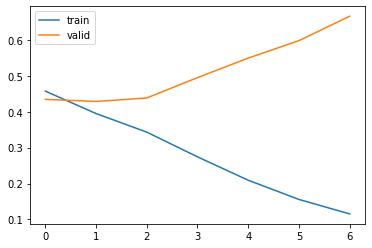

In [78]:
# Clearing backend 
backend.clear_session()

# Fixing the seed 
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Initializing model
model = Sequential()
# Adding input layer with 64 nuerons, relu activation function, he_unifrom the weight initializer
model.add(Dense(activation = 'relu', input_dim = X_train.shape[1],kernel_initializer='he_uniform', units=64))
# Adding hiddenlayer with 32 nuerons, relu activation func, he_uniform
model.add(Dense(activation = 'relu',kernel_initializer='he_uniform', units=32))
# Adding output layer 
model.add(Dense(1, activation = 'sigmoid')) 

# Defining optimizer with Adam
opt = optimizers.Adam(lr=0.001)

# Defining Early stopping
cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=5,
)

# Compile model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Fit model on train and validation with 50 epochs
history = model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          verbose=1,
          callbacks=cb
          )

# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

Not as good as the previous dropout model

In [79]:
# Making predictions with our model with our test set
y_pred = model.predict(X_test)
# Setting to optimal threshold
y_pred = y_pred > threshold

# Print our classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75      1593
           1       0.32      0.65      0.43       407

    accuracy                           0.65      2000
   macro avg       0.60      0.65      0.59      2000
weighted avg       0.77      0.65      0.68      2000



Early stopping works better than our baseline, and batch normalization but isn't as good as our dropout models wrt our evluation metric

In [80]:
# Saving model performance to our dataframe 
scores['Early Stop'] = pd.DataFrame({
    'Early Stop':[
        metrics.accuracy_score(y_test,y_pred),
        hist['accuracy'].iloc[-1], 
        hist['val_accuracy'].iloc[-1],
        metrics.recall_score(y_test, y_pred),
        metrics.precision_score(y_test,y_pred), 
        metrics.f1_score(y_test, y_pred)
        ]
    }, 
    columns=['Early Stop'], 
    index=['Test Accuracy', 'Train Accuracy', 'Val Accuracy','Recall', 'Precision','F1 Score']
)
scores

,Model 1,Opt Threshold,Batch Norm,Dropout,Drop Out_Opt,Early Stop
Test Accuracy,0.758500,0.737500,0.803000,0.664000,0.569500,0.652000
Train Accuracy,0.999687,0.999687,0.999062,0.866406,0.800937,0.956406
Val Accuracy,0.753750,0.753750,0.803750,0.806875,0.790625,0.755625
Recall,0.432432,0.498771,0.518428,0.653563,0.820639,0.648649
Precision,0.411215,0.387405,0.515892,0.333752,0.297683,0.323133
F1 Score,0.421557,0.436090,0.517157,0.441860,0.436887,0.431373


### L2 Regularization


Epoch 1/50
200/200 [==============================] - 2s 6ms/step - loss: 0.8510 - accuracy: 0.7972 - val_loss: 0.5531 - val_accuracy: 0.8012
Epoch 2/50
200/200 [==============================] - 1s 7ms/step - loss: 0.4898 - accuracy: 0.8077 - val_loss: 0.4706 - val_accuracy: 0.8087
Epoch 3/50
200/200 [==============================] - 1s 6ms/step - loss: 0.4555 - accuracy: 0.8161 - val_loss: 0.4596 - val_accuracy: 0.8087
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 0.4480 - accuracy: 0.8163 - val_loss: 0.4618 - val_accuracy: 0.8112
Epoch 5/50
200/200 [==============================] - 1s 5ms/step - loss: 0.4461 - accuracy: 0.8197 - val_loss: 0.4630 - val_accuracy: 0.8106
Epoch 6/50
200/200 [==============================] - 1s 5ms/step - loss: 0.4440 - accuracy: 0.8208 - val_loss: 0.4501 - val_accuracy: 0.8200
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4417 - accuracy: 0.8247 - val_loss: 0.4433 - val_accuracy: 0.8263
Epoch 

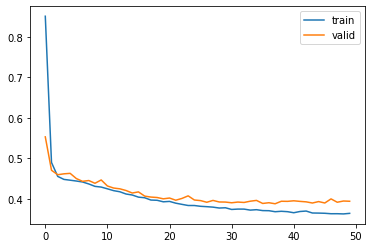

In [81]:
# Clearing backend 
backend.clear_session()

# Fixing the seed 
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Initializing model
model = Sequential()
# Adding input layer with 64 nuerons, relu activation function, he_unifrom the weight initializer
model.add(Dense(activation = 'relu', input_dim = X_train.shape[1],kernel_initializer='he_uniform', kernel_regularizer='l2', units=64))
# Adding hiddenlayer with 32 nuerons, relu activation func, he_uniform
model.add(Dense(activation = 'relu',kernel_initializer='he_uniform',kernel_regularizer='l2', units=32))
# Adding output layer 
model.add(Dense(1, activation = 'sigmoid')) 

# Defining optimizer with Adam
opt = optimizers.Adam(lr=0.001)

# Compile model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Fit model on train and validation with 50 epochs
history = model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          verbose=1)

# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

In [82]:
# Making predictions with our model with our test set
y_pred = model.predict(X_test)
# Setting to optimal threshold
y_pred = y_pred > threshold

# Print our classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1593
           1       0.43      0.79      0.56       407

    accuracy                           0.75      2000
   macro avg       0.68      0.76      0.69      2000
weighted avg       0.83      0.75      0.77      2000



In [83]:
# Saving model performance to our dataframe 
scores['l2'] = pd.DataFrame({
    'l2':[
        metrics.accuracy_score(y_test,y_pred),
        hist['accuracy'].iloc[-1], 
        hist['val_accuracy'].iloc[-1],
        metrics.recall_score(y_test, y_pred),
        metrics.precision_score(y_test,y_pred), 
        metrics.f1_score(y_test, y_pred)
        ]
    }, 
    columns=['l2'], 
    index=['Test Accuracy', 'Train Accuracy', 'Val Accuracy','Recall', 'Precision','F1 Score']
)
scores

,Model 1,Opt Threshold,Batch Norm,Dropout,Drop Out_Opt,Early Stop,l2
Test Accuracy,0.758500,0.737500,0.803000,0.664000,0.569500,0.652000,0.746000
Train Accuracy,0.999687,0.999687,0.999062,0.866406,0.800937,0.956406,0.872969
Val Accuracy,0.753750,0.753750,0.803750,0.806875,0.790625,0.755625,0.858125
Recall,0.432432,0.498771,0.518428,0.653563,0.820639,0.648649,0.788698
Precision,0.411215,0.387405,0.515892,0.333752,0.297683,0.323133,0.432032
F1 Score,0.421557,0.436090,0.517157,0.441860,0.436887,0.431373,0.558261


L2 did a better job than some of my early models. The L2 was able to penalize enough to reduce overfitting but this is still something I need to explore more in the future to improve

### L1 Regularization
Last technique I want to explore is L1 regularization

Epoch 1/50
200/200 [==============================] - 2s 6ms/step - loss: 5.8943 - accuracy: 0.7962 - val_loss: 1.1721 - val_accuracy: 0.7906
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 0.8369 - accuracy: 0.7977 - val_loss: 0.7549 - val_accuracy: 0.7906
Epoch 3/50
200/200 [==============================] - 1s 6ms/step - loss: 0.7384 - accuracy: 0.7977 - val_loss: 0.7361 - val_accuracy: 0.7906
Epoch 4/50
200/200 [==============================] - 1s 7ms/step - loss: 0.7203 - accuracy: 0.7977 - val_loss: 0.7190 - val_accuracy: 0.7906
Epoch 5/50
200/200 [==============================] - 2s 9ms/step - loss: 0.7072 - accuracy: 0.7977 - val_loss: 0.7068 - val_accuracy: 0.7906
Epoch 6/50
200/200 [==============================] - 1s 7ms/step - loss: 0.6992 - accuracy: 0.7977 - val_loss: 0.7019 - val_accuracy: 0.7906
Epoch 7/50
200/200 [==============================] - 1s 7ms/step - loss: 0.6945 - accuracy: 0.7977 - val_loss: 0.6981 - val_accuracy: 0.7906
Epoch 

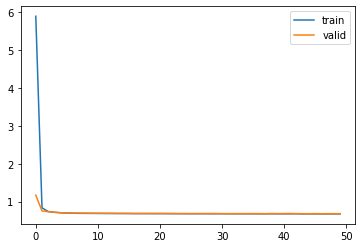

In [84]:
# Clearing backend 
backend.clear_session()

# Fixing the seed 
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Initializing model
model = Sequential()
# Adding input layer with 64 nuerons, relu activation function, he_unifrom the weight initializer
model.add(Dense(activation = 'relu', input_dim = X_train.shape[1],kernel_initializer='he_uniform', kernel_regularizer='l1', units=64))
# Adding hiddenlayer with 32 nuerons, relu activation func, he_uniform
model.add(Dense(activation = 'relu',kernel_initializer='he_uniform',kernel_regularizer='l1', units=32))
# Adding output layer 
model.add(Dense(1, activation = 'sigmoid')) 

# Defining optimizer with Adam
opt = optimizers.Adam(lr=0.001)

# Compile model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Fit model on train and validation with 50 epochs
history = model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          verbose=1)

# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

In [85]:
# Making predictions with our model with our test set
y_pred = model.predict(X_test)
# Setting to optimal threshold
y_pred = y_pred > threshold

# Print our classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.62      0.74      1593
           1       0.34      0.79      0.48       407

    accuracy                           0.65      2000
   macro avg       0.63      0.70      0.61      2000
weighted avg       0.80      0.65      0.68      2000



In [86]:
# Saving model performance to our dataframe 
scores['l1'] = pd.DataFrame({
    'l1':[
        metrics.accuracy_score(y_test,y_pred),
        hist['accuracy'].iloc[-1], 
        hist['val_accuracy'].iloc[-1],
        metrics.recall_score(y_test, y_pred),
        metrics.precision_score(y_test,y_pred), 
        metrics.f1_score(y_test, y_pred)
        ]
    }, 
    columns=['l1'], 
    index=['Test Accuracy', 'Train Accuracy', 'Val Accuracy','Recall', 'Precision','F1 Score']
)
scores

,Model 1,Opt Threshold,Batch Norm,Dropout,Drop Out_Opt,Early Stop,l2,l1
Test Accuracy,0.758500,0.737500,0.803000,0.664000,0.569500,0.652000,0.746000,0.650000
Train Accuracy,0.999687,0.999687,0.999062,0.866406,0.800937,0.956406,0.872969,0.797656
Val Accuracy,0.753750,0.753750,0.803750,0.806875,0.790625,0.755625,0.858125,0.790625
Recall,0.432432,0.498771,0.518428,0.653563,0.820639,0.648649,0.788698,0.786241
Precision,0.411215,0.387405,0.515892,0.333752,0.297683,0.323133,0.432032,0.342980
F1 Score,0.421557,0.436090,0.517157,0.441860,0.436887,0.431373,0.558261,0.477612


L1 generalized well on the training data and had a good recall score. Our dropout with the optimal rates is the best performer though

## Model Performance Evaluation
- Evaluate the model on different performance metrics and comment on the performance and scope of improvement

In [87]:
# Print performance of all the models
scores

,Model 1,Opt Threshold,Batch Norm,Dropout,Drop Out_Opt,Early Stop,l2,l1
Test Accuracy,0.758500,0.737500,0.803000,0.664000,0.569500,0.652000,0.746000,0.650000
Train Accuracy,0.999687,0.999687,0.999062,0.866406,0.800937,0.956406,0.872969,0.797656
Val Accuracy,0.753750,0.753750,0.803750,0.806875,0.790625,0.755625,0.858125,0.790625
Recall,0.432432,0.498771,0.518428,0.653563,0.820639,0.648649,0.788698,0.786241
Precision,0.411215,0.387405,0.515892,0.333752,0.297683,0.323133,0.432032,0.342980
F1 Score,0.421557,0.436090,0.517157,0.441860,0.436887,0.431373,0.558261,0.477612


Evaluating the models based on the chosen metric (Recall) we can see the the Dropout model with the optimal drop rates (Drop Out_Opt) was our best performer and the selection for this case. However, there are still room for improvement such as evaluating denser hidden layers and different number of neurons. I would also recommend combining techniques to see if that further improves performance

# Insights and Recommendations

## Key Observations

Characteristics for customer base:
- Majority of customers are male, but women have been more likely to exit the bank within 6 months
- Majority of customers have Fair credit
- Majority of those who leave have fair credit
- Younger customers (30-40yrs range) tend to stay as existing customers where as older customers (40-50yrs) tend to leave within the first 6 months
- 50% customers have balances from $0 - $125k
- Customers tend to have 2 products with the bank but those who left tend to have 1
- Existing customers tend to have a credit card, but those who left tend to not
- Tend to be active, inactive tend to leave
- Salary for 50%ers tend to be between $50k - $150k

Observations:
- Average credit score is 650 but ranges from 350 to 850
- Average age of customer is 39yr, 50% of the customer base is from 32 to 44
- Customers on average have been with the bank for 5 years
- Average balance is a little less than \$76.5k, but we have an outlier around \$250,900
- Customers on average have more than 1 product
- 70% of customers have credit cards
- 51% are active members
- Average salary is \$100,090
- 20% of customers exited bank within 6 months

## Business Recommendations

- One trend I noticed is that credit card holders tend to leave the bank more often than those who aren't. I would focus on understanding what is turning customers away from their CC services
- I would also focus on bringing in more customers in the upper half of credit scores. We can see from our EDA that majority of the customers who have left in the past had poor or fair credit where as those with higher credit scores tend to stay
- I would target more younger (40yrs or less) customers since EDA did show they tend to stay
- For further analysis, it would be nice to have data on how often a customer called customer service or had to file a complaint and what those topics were to see if we have a trend with issues the bank could address